In [1]:
from __future__ import division
import os,sys


In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
np.random.seed(12345)
np.set_printoptions(precision=4)
plt.rc('figure',figsize=(10,6))
br='\n'

In [4]:
def loadDataSet(fileName):
    numFeat=len(open(fileName).readline().split('\t'))-1
    dataArr=[]
    labelArr=[]
    fr=open(fileName)
    for line in fr.readlines():
        lineArr=[]
        #lineArr.append(1.0)
        curLine=line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        labelArr.append(float(curLine[-1]))
    return dataArr,labelArr

In [5]:
from math import *
from numpy import *
def standRegres(xArr,yArr):
    xMat=mat(xArr)
    yMat=mat(yArr).T
    xTx=xMat.T*xMat
    if(linalg.det(xTx)==0.0):
        print "This matrix is singular, cannot do inverse"
        return 
    ws=xTx.I*(xMat.T*yMat)
    return ws

In [6]:
#!type data\ex0.txt

In [7]:
xArr,yArr=loadDataSet("data/ex0.txt")

In [8]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [9]:
yArr[0:2]

[3.176513, 3.816464]

In [10]:
ws=standRegres(xArr,yArr)

In [11]:
ws

matrix([[ 3.0077],
        [ 1.6953]])

In [12]:
xMat=mat(xArr)
yMat=mat(yArr)
yHat=xMat*ws

In [13]:
print yArr[0:2]
print yHat[0:2]

[3.176513, 3.816464]
[[ 3.1226]
 [ 3.733 ]]


In [14]:
yHat[0:2].tolist()

[[3.1225708358971276], [3.7330192222448586]]

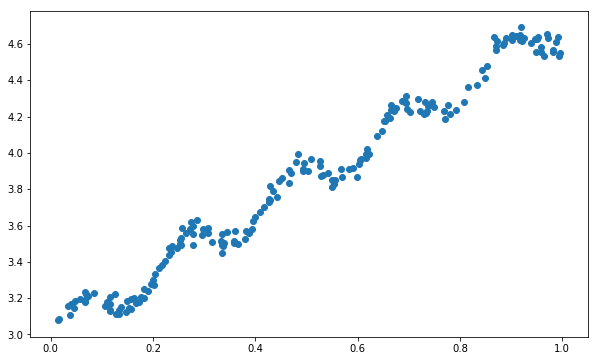

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])

In [16]:
xCopy=xMat.copy()
xCopy.sort(0)
yHat=xCopy*ws

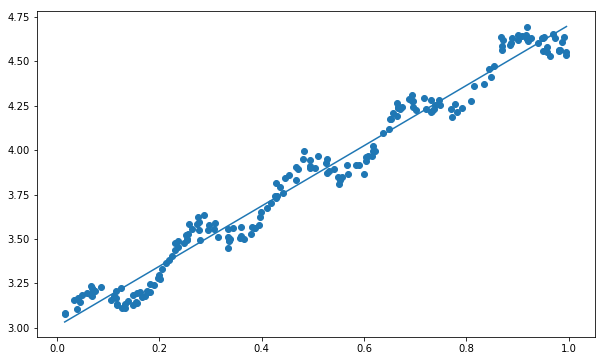

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])
ax.plot(xCopy[:,1],yHat)

In [18]:
yHat=xMat*ws

In [19]:
corrcoef(yHat.T,yMat)

array([[ 1.    ,  0.9865],
       [ 0.9865,  1.    ]])

In [20]:
def lwlr(testPoint,xArr,yArr,k=1.0):#局部加权线性回归训练
    xMat=mat(xArr)
    yMat=mat(yArr).T
    m=shape(xMat)[0]
    weights=mat(eye((m)))
    for j in range(m):
        diffMat=testPoint-xMat[j,:]
        weights[j,j]=exp(diffMat*diffMat.T/(-2.0*k**2))#权重值大小以指数级衰减，
        #k控制速度
    xTx=xMat.T*(weights*xMat)
    if linalg.det(xTx)==0.0:
        print "This matrix is singular, cannot do inverse"
        return 
    ws=xTx.I*(xMat.T*(weights*yMat))#得到回归系数ws的一个估计
    return testPoint*ws

In [21]:
def lwlrTest(testArr,xArr,yArr,k=1.0):#为数据集中每个点调用lwlr(),有助于求解k的大小
    m=shape(testArr)[0]
    yHat=zeros(m)
    for i in range(m):
        yHat[i]=lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [22]:
def lwlrTestPlot(xArr,yArr,k=1.0):
    yHat=zeros(shape(yArr))
    xCopy=mat(xArr)
    xCopy.sort(0)
    for i in range(shape(xArr)[0]):
        yHat[i]=lwlr(xCopy[i],xArr,yArr,k)
    return yHat,xCopy

In [23]:
xArr,yArr=loadDataSet("data/ex0.txt")

In [24]:
print yArr[0]
print lwlr(xArr[0],xArr,yArr,1.0)
print lwlr(xArr[0],xArr,yArr,0.05)
print lwlr(xArr[0],xArr,yArr,0.001)

3.176513
[[ 3.122]]
[[ 3.1728]]
[[ 3.2018]]


In [25]:
yHat=lwlrTest(xArr,xArr,yArr,1.0)

In [26]:
xMat=mat(xArr)
srtlnd=xMat[:,1].argsort(0)
xSort=xMat[srtlnd][:,0,:]

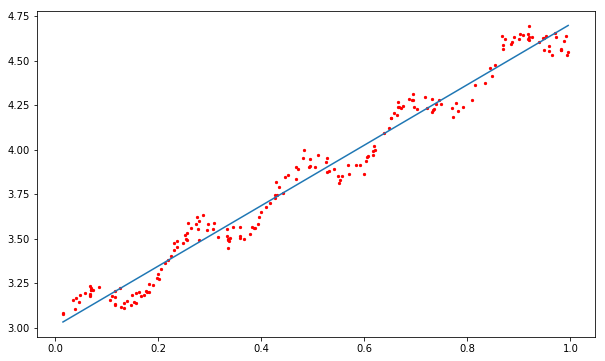

In [27]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0],s=5,c='red')
ax.plot(xSort[:,1],yHat[srtlnd])

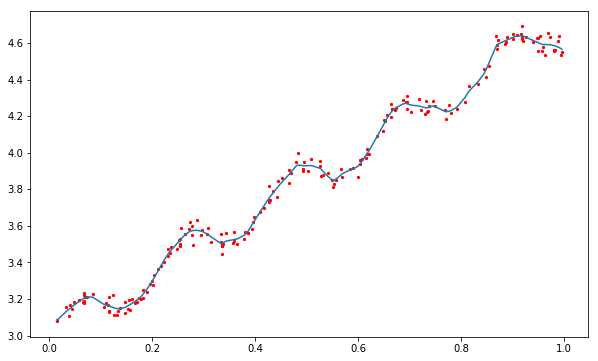

In [28]:
#改变k参数的值
yHat=lwlrTest(xArr,xArr,yArr,0.01)

xMat=mat(xArr)
srtlnd=xMat[:,1].argsort(0)
xSort=xMat[srtlnd][:,0,:]

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0],s=5,c='red')
ax.plot(xSort[:,1],yHat[srtlnd])

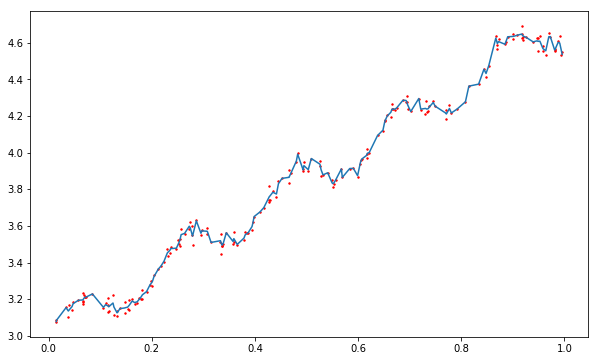

In [29]:
#改变k参数的值，k=0.003
yHat=lwlrTest(xArr,xArr,yArr,0.003)
xMat=mat(xArr)
srtlnd=xMat[:,1].argsort(0)
xSort=xMat[srtlnd][:,0,:]

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0],s=2,c='red')
ax.plot(xSort[:,1],yHat[srtlnd])

In [30]:
def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()

abX,abY=loadDataSet('data/abalone.txt')

yHat01=lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)
yHat1=lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)
yHat10=lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)

err01=rssError(abY[0:99],yHat01.T)
err1=rssError(abY[0:99],yHat1.T)
err10=rssError(abY[0:99],yHat10.T)

print err01,err1,err10
print '\n'

yHat01=lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)
yHat1 =lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)
yHat10=lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)

err01=rssError(abY[100:199],yHat01.T)
err1=rssError(abY[100:199],yHat1.T)
err10=rssError(abY[100:199],yHat10.T)
print err01,err1,err10
print '\n'

ws=standRegres(abX[0:99],abY[0:99])
yHat=mat(abX[100:199])*ws
rssError(abY[100:199],yHat.T.A)

56.7842091184 429.89056187 549.118170883


25119.4591112 573.52614419 517.571190538




518.63631532464512

In [31]:
def ridgeRegres(xArr,yArr,lam=0.2):
    xMat=mat(xArr)
    yMat=mat(yArr).T
    xTx=xMat.T*xMat
    denom=xTx+eye(shape(xMat)[1])*lam
    if linalg.det(denom)==0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws=denom.I*(xMat.T*yMat.T)
    return ws

def ridgeTest(xArr,yArr):
    xMat=mat(xArr)
    yMat=mat(yArr).T
    yMean=mean(yMat,0)
    yMat=yMat-yMean
###
    xMeans=mean(xMat,0)
    xVar=var(xMat,0)
    xMat=(xMat-xMeans)/xVar
    numTestPts=30
    wMat=zeros((numTestPts,shape(xMat)[1]))
#     for i in range(numTestPts):
#         ws=ridgeRegres(xMat,yMat,exp(i-10)
#         wMat[i,:]=ws.T
    for i in range(numTestPts):
        ws=ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:]=ws.T
    return wMat
def loadDataSet(fileName):
    numFeat=len(open(fileName).readline().split('\t'))-1
    dataArr=[]
    labelArr=[]
    fr=open(fileName)
    for line in fr.readlines():
        lineArr=[]
        curLine=line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataArr.append(lineArr)
        labelArr.append(float(curLine[-1]))
    return dataArr,labelArr

In [32]:
abX,abY=loadDataSet('data/abalone.txt')

In [33]:
print abX[0:2]
print abY[0:2]
print mat(abX[:5])
print mat(abY[:5])
print abY[:5]

[[1.0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15], [1.0, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07]]
[15.0, 7.0]
[[ 1.      0.455   0.365   0.095   0.514   0.2245  0.101   0.15  ]
 [ 1.      0.35    0.265   0.09    0.2255  0.0995  0.0485  0.07  ]
 [-1.      0.53    0.42    0.135   0.677   0.2565  0.1415  0.21  ]
 [ 1.      0.44    0.365   0.125   0.516   0.2155  0.114   0.155 ]
 [ 0.      0.33    0.255   0.08    0.205   0.0895  0.0395  0.055 ]]
[[ 15.   7.   9.  10.   7.]]
[15.0, 7.0, 9.0, 10.0, 7.0]


In [34]:
ridgeWeights=ridgeTest(abX,abY)

In [35]:
ridgeWeights[0:2]

array([[ 0.043 , -0.0227,  0.1321,  0.0208,  2.224 , -0.999 , -0.1173,
         0.1662],
       [ 0.043 , -0.0227,  0.1321,  0.0208,  2.224 , -0.999 , -0.1173,
         0.1662]])

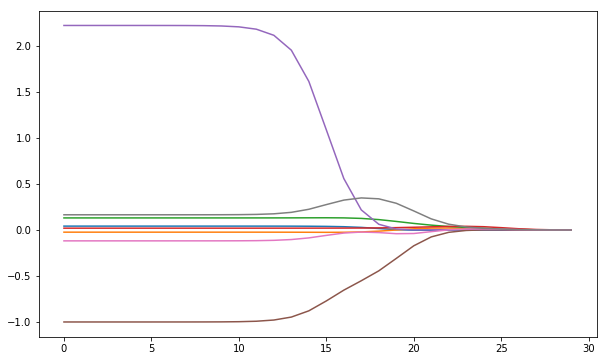

423.173802638 429.629980174 460.977796571


In [36]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

RGws01=ridgeRegres(mat(abX[0:99]),mat(abY[0:99]).T,0.1)
RGws02=ridgeRegres(mat(abX[0:99]),mat(abY[0:99]).T,0.2)
RGws05=ridgeRegres(mat(abX[0:99]),mat(abY[0:99]).T,0.5)

yHat01=mat(abX[100:199])*RGws01
yHat02=mat(abX[100:199])*RGws02
yHat05=mat(abX[100:199])*RGws05

err01=rssError(abY[100:199],yHat01.T.A)
err02=rssError(abY[100:199],yHat02.T.A)
err05=rssError(abY[100:199],yHat05.T.A)

print err01,err02,err05

In [37]:
def regularize(xMat):
    inMat=xMat.copy()
    inMeans=mean(inMat,0)
    inVar=var(inMat,0)
    inMat=(inMat-inMeans)/inVar
    return inMat

In [38]:
def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()

In [39]:
def stageWise(xArr,yArr,eps=0.01,numlt=100):
    xMat=mat(xArr)
    yMat=mat(yArr).T
    yMean=mean(yMat,0)
    yMat=yMat-yMean
    xMat=regularize(xMat)
    m,n=shape(xMat)
    returnMat=zeros((numlt,n))
    ws=zeros((n,1))
    wsTest=ws.copy()
    wsMax=ws.copy()
    for i in range(numlt):
        #print ws.T
        lowestError=inf;
        for j in range(n):
            for sign in [-1,1]:
                wsTest=ws.copy()
                wsTest[j]+=eps*sign
                yTest=xMat*wsTest
                rssE=rssError(yMat.A,yTest.A)
                if rssE<lowestError:
                    lowestError=rssE
                    wsMax=wsTest
        ws=wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat

In [40]:
abX,abY=loadDataSet('data/abalone.txt')

In [41]:
returnMat=stageWise(abX,abY,0.01,200)

In [42]:
returnMat

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

In [43]:
xMat=mat(abX)
yMat=mat(abY).T
xMat=regularize(xMat)
yMat=yMat-mean(yMat,0)
weights=standRegres(xMat,yMat.T)
weights.T

matrix([[ 0.043 , -0.0227,  0.1321,  0.0208,  2.224 , -0.999 , -0.1173,
          0.1662]])

In [45]:
stageWeights=stageWise(abX,abY,0.005,1000)#eps=0.05,经过1000次迭代后的结果

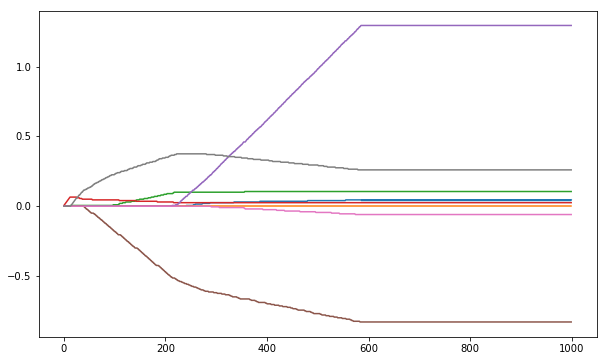

In [46]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(stageWeights)
plt.show()

In [47]:
from sklearn import linear_model
clf=linear_model.LinearRegression()
clf.fit([[0,0],[1,1],[2,2]],[0,1,2])
print clf.coef_

[ 0.5  0.5]


In [48]:
clf=linear_model.LinearRegression()
abX,abY=loadDataSet('data/abalone.txt')
trainX=abX[0:99]
trainY=abY[0:99]
testX=abX[100:199]
testY=abY[100:199]

clf.fit(trainX,trainY)
yHat=clf.predict(testX)

In [49]:
print yHat[:2]
print testY[:2]
clf.score(testX,testY)

[  7.484   10.8339]
[7.0, 15.0]


0.53001606224451303

In [50]:
rssError(array(yHat),array(testY))

608.50102195578586

In [51]:
sqrt(rssError(array(yHat),array(testY)))/100

0.24667813481453638

In [52]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [53]:
clf=linear_model.Ridge(alpha=.5)
clf.fit([[0,0],[0,0],[1,1]],[0,.1,1])
print clf.coef_
print clf.intercept_

[ 0.3455  0.3455]
0.136363636364


In [54]:
clf=linear_model.Lasso(alpha=0.1)
clf.fit([[0,0],[1,1]],[0,1])

clf.predict([[1,1]])

array([ 0.8])

In [55]:
clf=linear_model.ElasticNet(alpha=1.0)
clf.fit([[0,0],[1,1]],[0,1])

clf.predict([[1,1]])

array([ 0.5])

In [56]:
n_samples,n_features=10,5
np.random.seed(0)
y=np.random.randn(n_samples)
X=np.random.randn(n_samples,n_features)
clf=linear_model.SGDRegressor()
clf.fit(X,y)

clf.predict([[1,1,1,1,1]])

array([ 0.1536])